# importing modules

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np    # for numerical computation
import statistics as st
import scipy.stats as sts

# reading the file and separating categorical and numerical cols

In [2]:
df= pd.read_csv("DS1_C5_S4_Credit_Data_Hackathon.csv") # read_csv: inbuilt function of pandas to read files 
def col(df):
    global x,y,x1,y1
    x=df.select_dtypes(include="object")
    y=df.select_dtypes(exclude="object")
    x1=list(x.columns)
    y1=list(y.columns)
    print(tabulate({"Categorical":x1,
                "Numerical": y1}, headers = ["categorical", "numerical"]))
col(df)

categorical          numerical
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


# getting basic info about datatype and null values

In [3]:
info=df.info()
no=df.isnull().sum()
no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

# treating null values

In [4]:
df['AMT_GOODS_PRICE']=df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())
df['CNT_FAM_MEMBERS']=df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mode()[0])
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0])
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0])

# getting mean and median and std deviantion also skew value for num values

In [5]:
mean=[]
median=[]
stddev=[]
null=[]
skewness=[]
for j in y1:
    mean.append(df[j].mean())
    median.append(df[j].median())
    stddev.append(df[j].std())
    null.append(df[j].isnull().sum())
    skewness.append(sts.skew(df[j]))
data=pd.DataFrame()
data['numcols']=y1
data['mean']=mean
data['median']=median
data['stddev']=stddev
data['nullcount']=null
data['skewness']=skewness
data

,numcols,mean,median,stddev,nullcount,skewness
0,SK_ID_CURR,158006.140860,157877.0,33481.166996,0,0.003998
1,TARGET,0.080930,0.0,0.272729,0,3.073176
2,CNT_CHILDREN,0.417390,0.0,0.721014,0,1.862881
3,AMT_INCOME_TOTAL,169426.070273,144000.0,383500.744277,0,282.943808
4,AMT_CREDIT,599003.446500,513040.5,402051.959121,0,1.209375
5,AMT_GOODS_PRICE,538345.148971,450000.0,369248.086760,0,1.329193
6,DAYS_EMPLOYED,63292.222060,-1219.0,140839.697296,0,1.676912
7,MOBILE,0.999990,1.0,0.003162,0,-316.223023
8,WORK_PHONE,0.821280,1.0,0.383120,0,-1.677187
9,HOME_PHONE,0.199740,0.0,0.399807,0,1.502033


# univariate analaysis on categorical columns

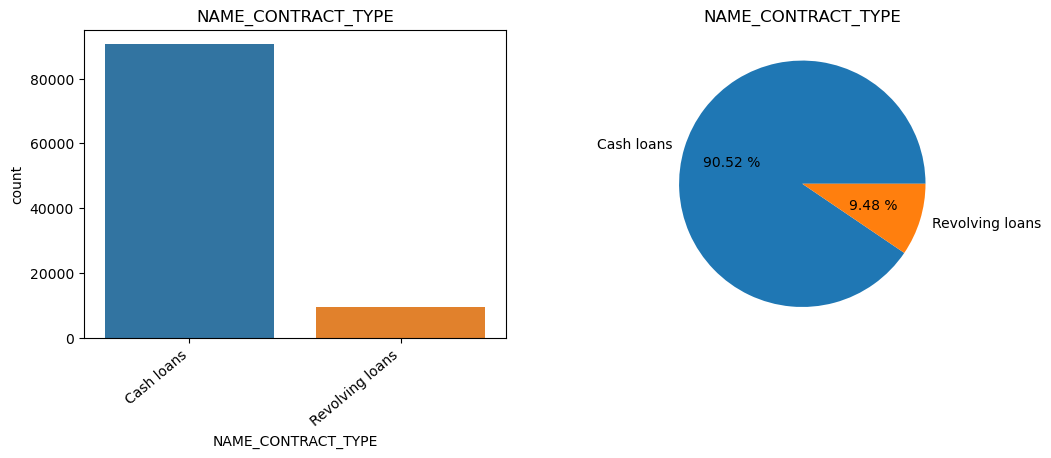

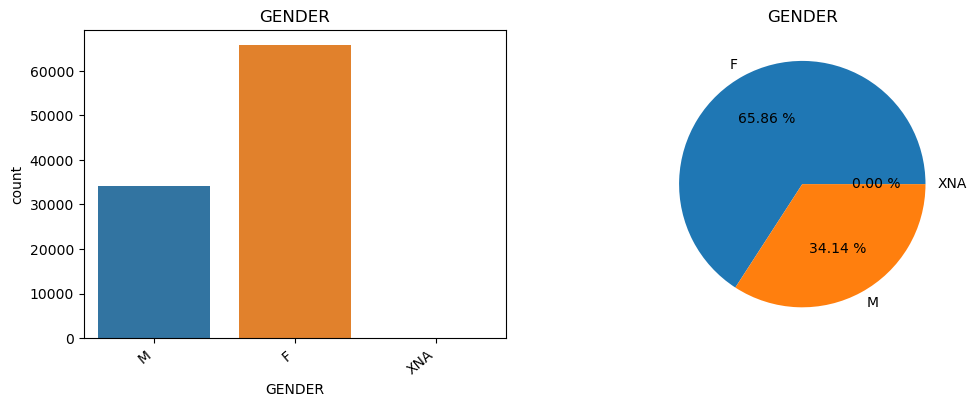

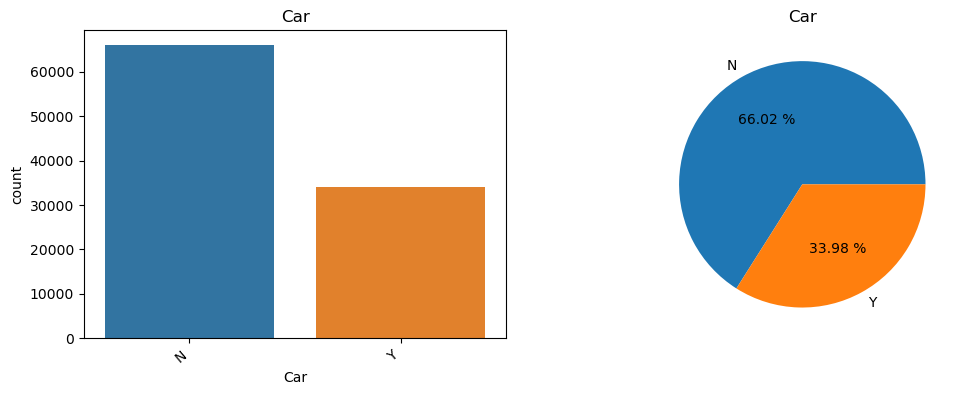

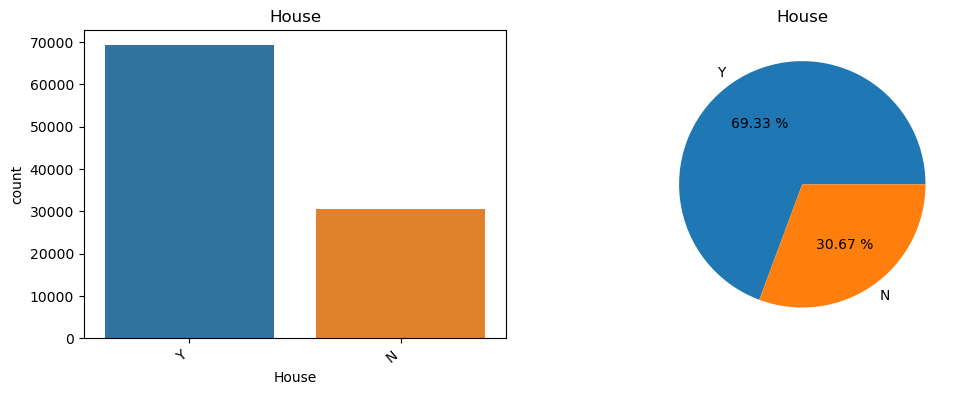

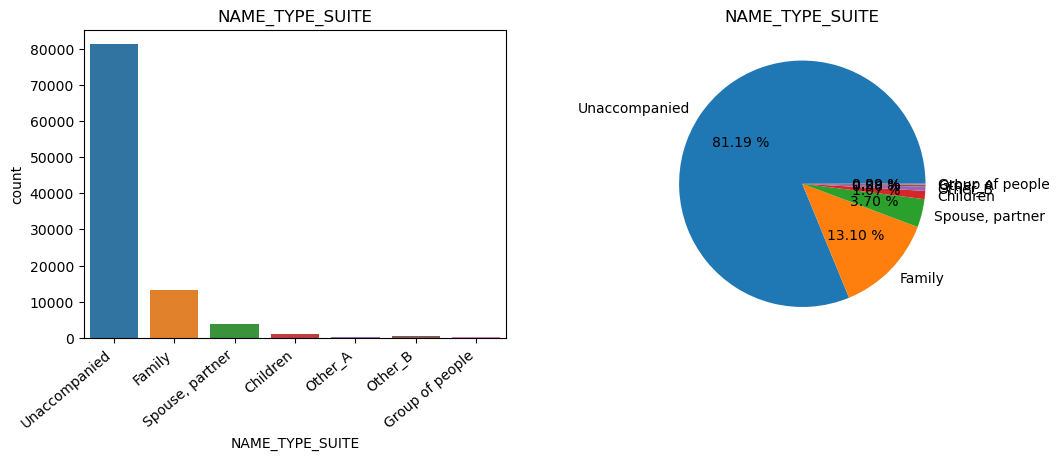

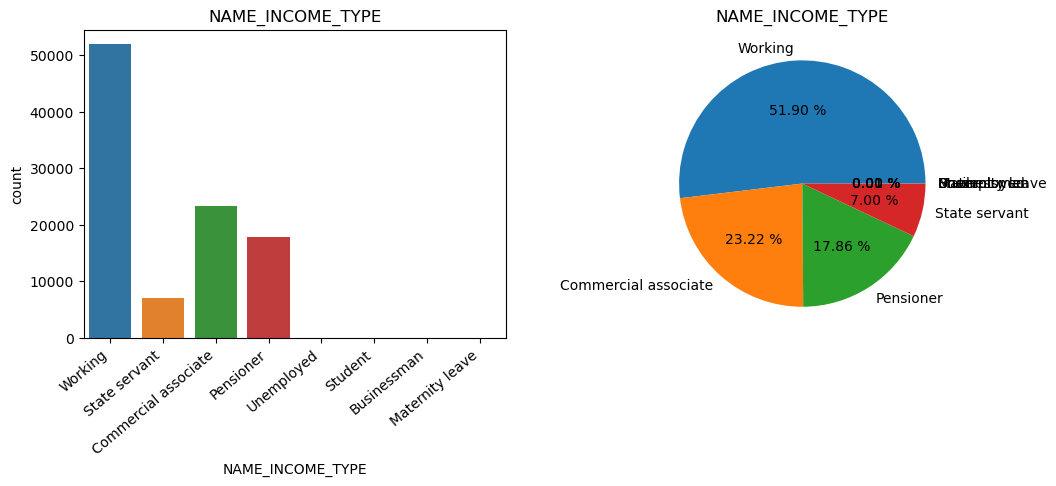

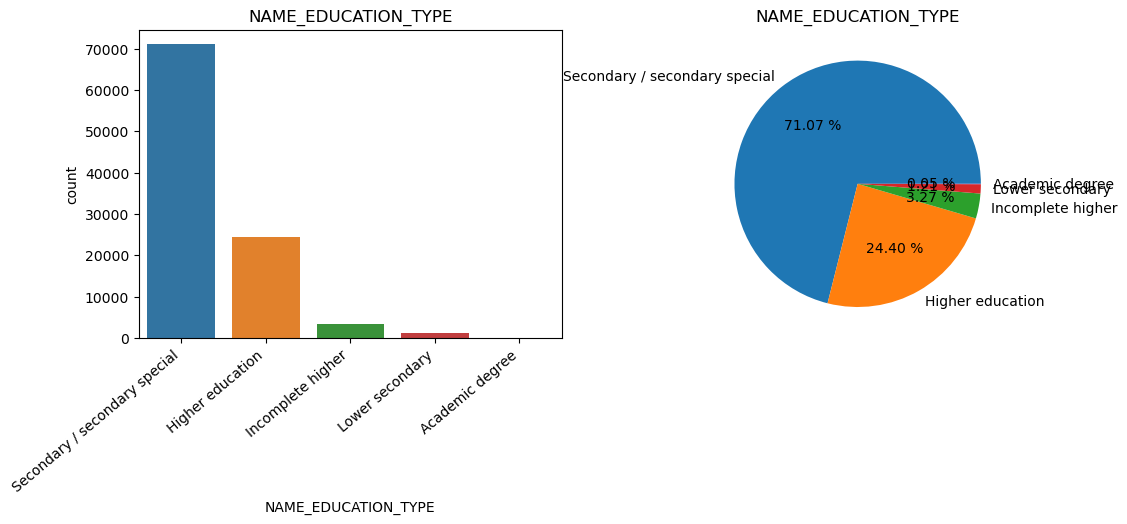

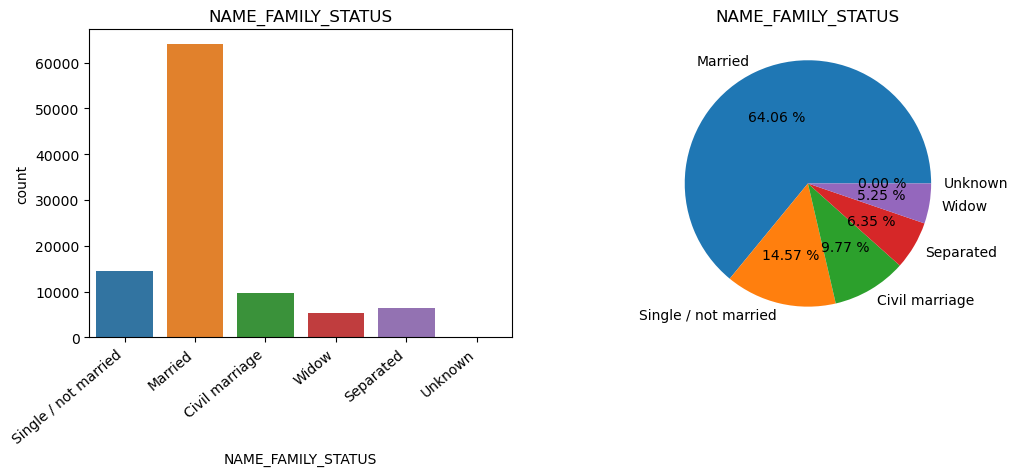

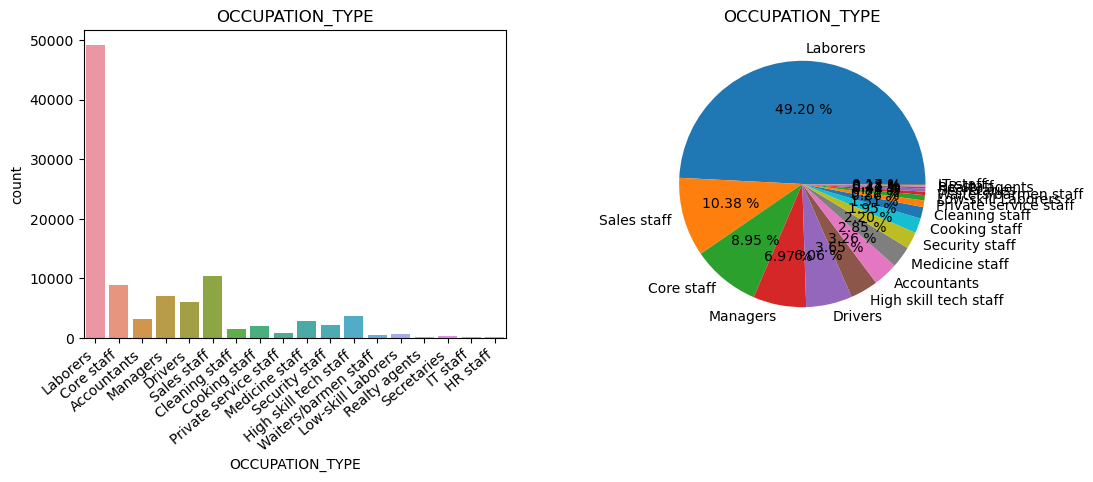

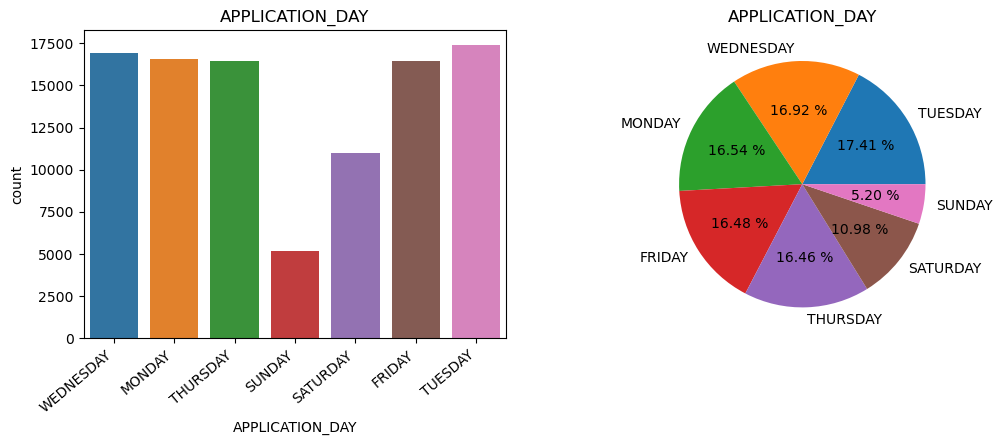

In [6]:
for i in x1:
    labels=df[i].value_counts().index
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)#1 row,2 cols,1figure
    ax=sns.countplot(x=i,data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right")
    plt.title(i)
    plt.subplot(1,2,2)
    plt.pie(df[i].value_counts(),labels=labels,autopct='%.2f %%')
    plt.title(i)

In [ ]:
""""INTERPRETATIONS
LOAN -- CASH LOANS ARE MORE THAN REVOLVING LOANS
GENDER- FEMALE ARE MORE THAN MALE
CAR OWNER-NO CAR APPLICANTS ARE MORE THAN CAR APPLICANTS
HOUSE OWNER- HOUSE OWNERS ARE MORE THAN NO HOME OWNERS
ACCOMPANIED PERSON - LOAN ARE MOSTLY TO UNACCOMPANIED
INCOME TYPE- WORKING PERSONS ARE MORE THERE ARE  ALSO PENSIONER AND COMMERCIAL ASSOCIATE STATE SERVANTS
EDUCATION TYPE -SECONDARY SPECIAL IS HIGHEST CATEGORY AND ACADEMIC DEGREE HOLDERS ARE LOW IN COUNT
FAMILY STATUS- MARRIED ARE MORE AND WIDOW ARE LESS IN COUNT
OCCUPATION TYPE- THERE ARE MORE UNEMPLOYEED OR PENSIONERS """

# univariate analysis on numerical columns

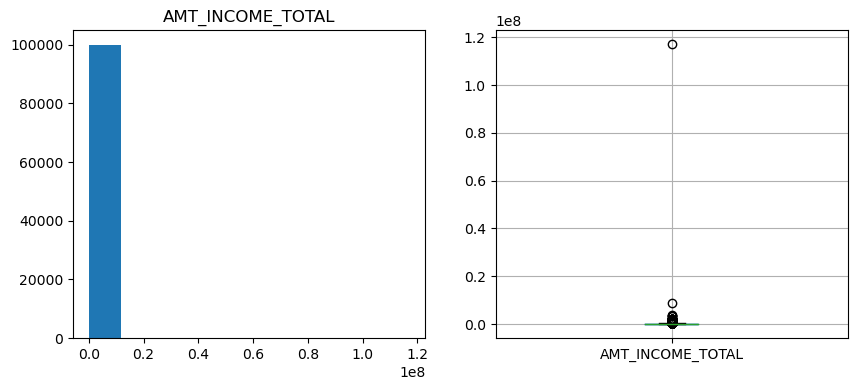

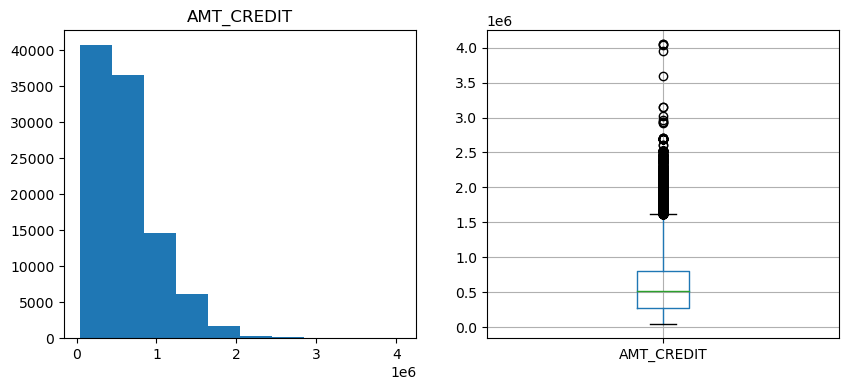

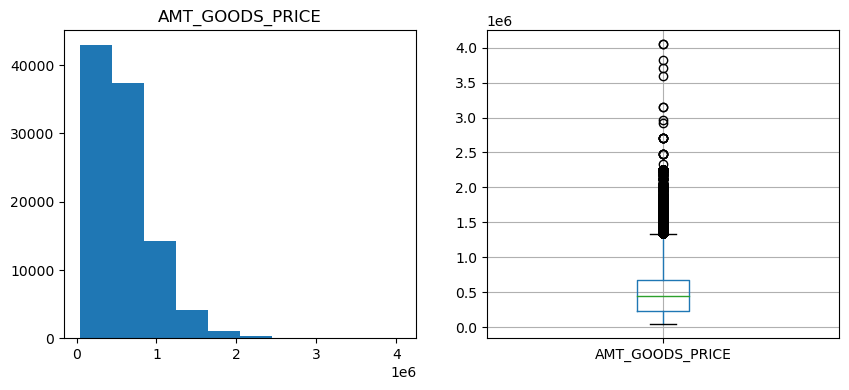

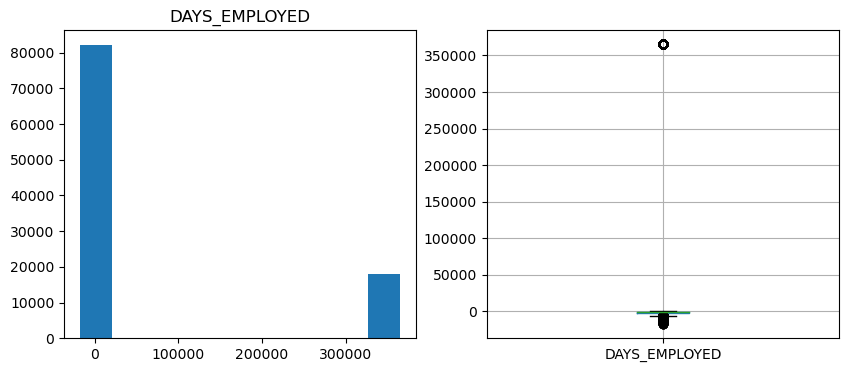

In [7]:
l1=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
for k in l1:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.hist(df[k])
    plt.title(k)
    plt.subplot(1,2,2)
    df.boxplot(column=[str(k)])

In [ ]:
"""INTERPRETATIONS
THERE ARE MANY OUTLIERS IN AMOUNT CREDITED AND GOODS PRICE
TOTAL INCOME- AMOUNT IS DISTRIBUTED TO BETWEEN 0.0-0.15,1.12
TOTAL DOCS TO BE SUBMITTER ARE MOSTLY 1 BUT DISTRIBUTED TO 4
EMAIL ID IS NOT PROVIDED BY MOSTLY
HOME PHONE NO ARE NOT PROVIDED BY MANY THEY PREFER WORK PHONE
DAYS EMPLOYED ARE DISTRIBUTED LESS THAN 50000 BUT OUTLIER WITH 365254
MOBILE PHONE NO ARE GIVEN BY ALL
ALL MOBILE NO ARE REACHABLE
"""


In [ ]:
# BIVARIATE ANALYSIS CATEGORICAL TO CATEGORICAL 

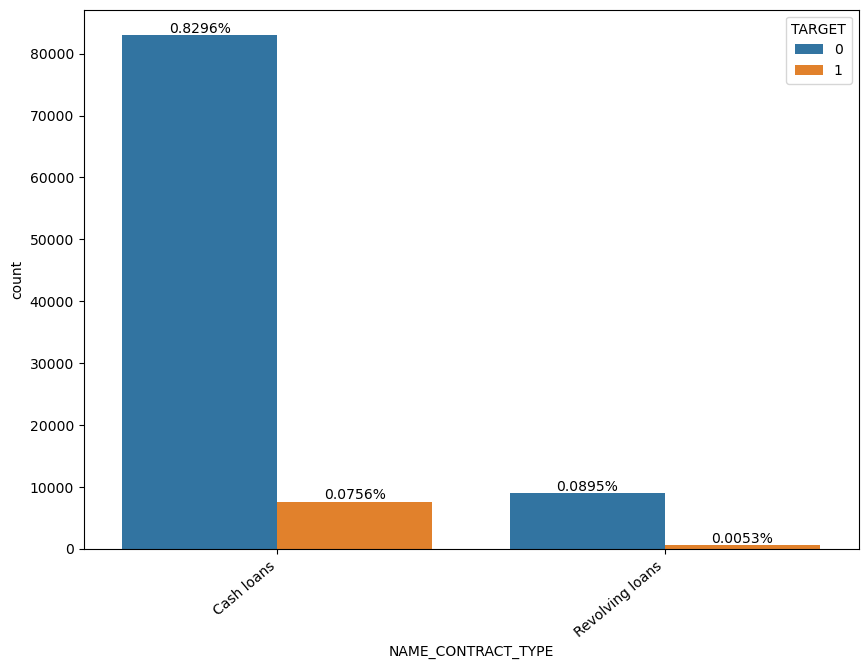

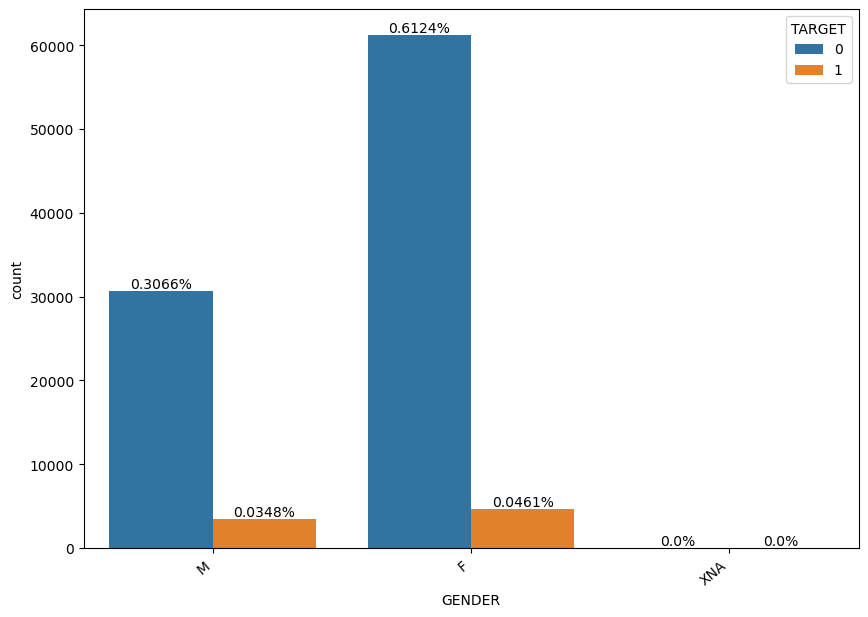

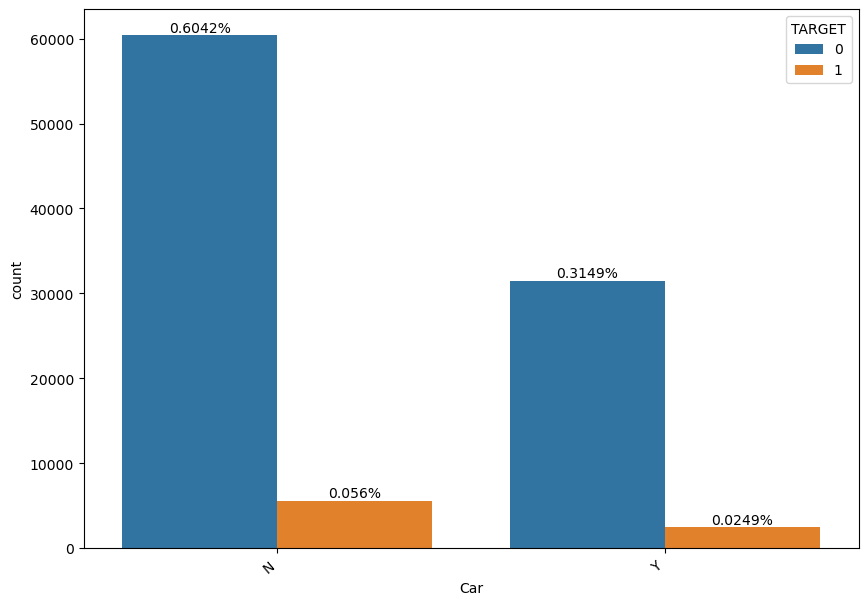

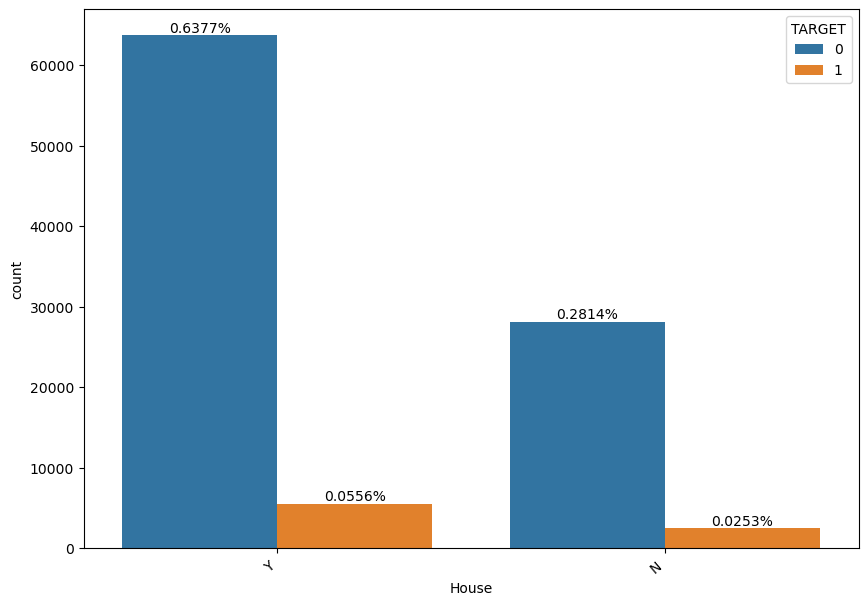

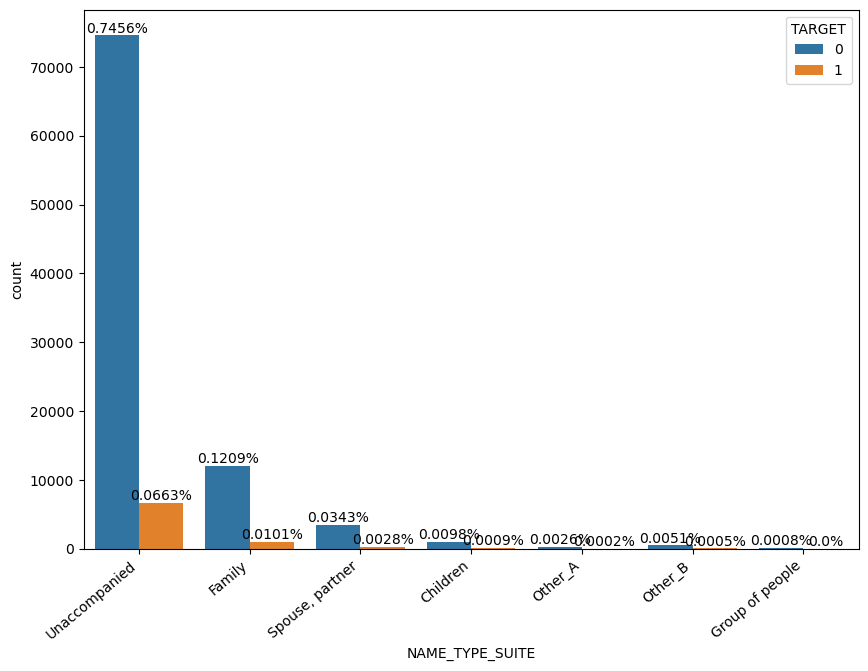

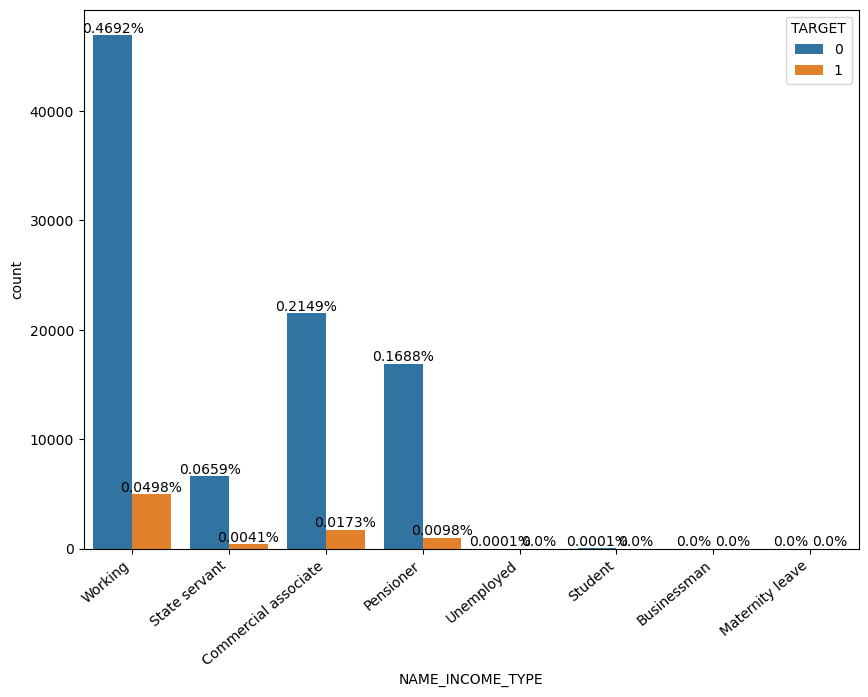

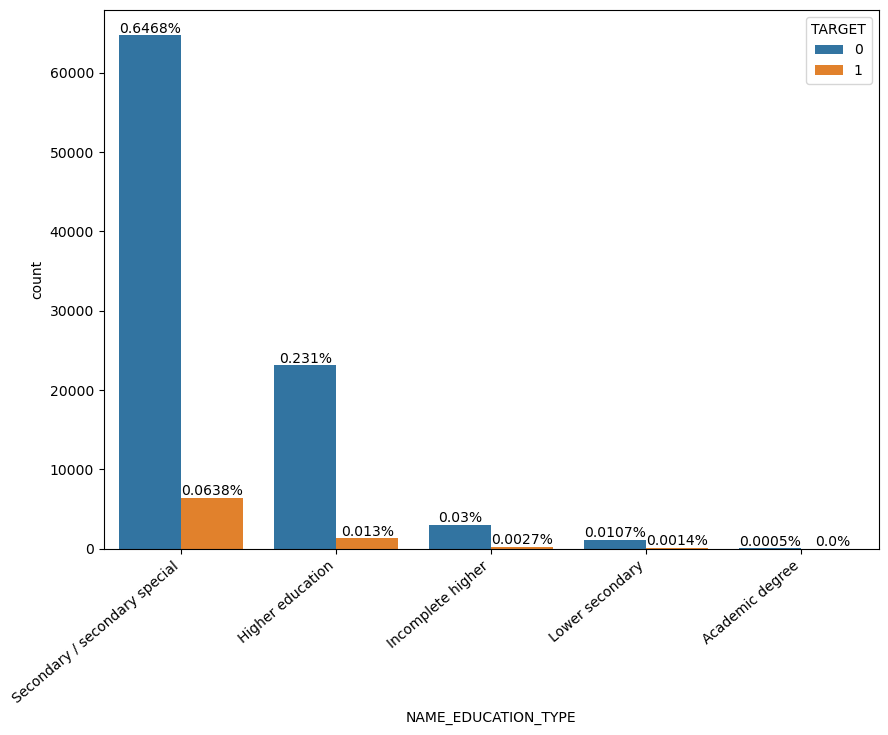

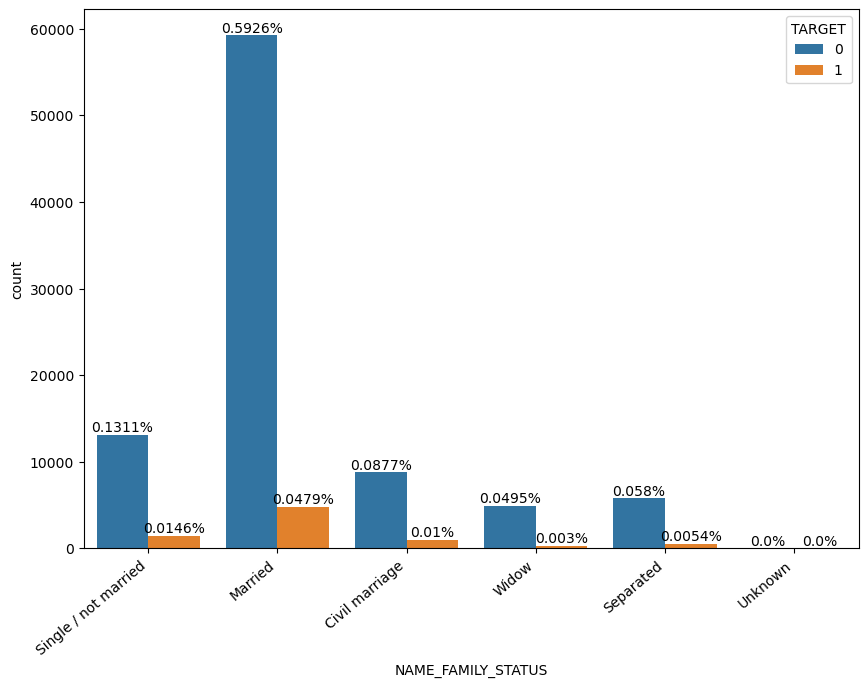

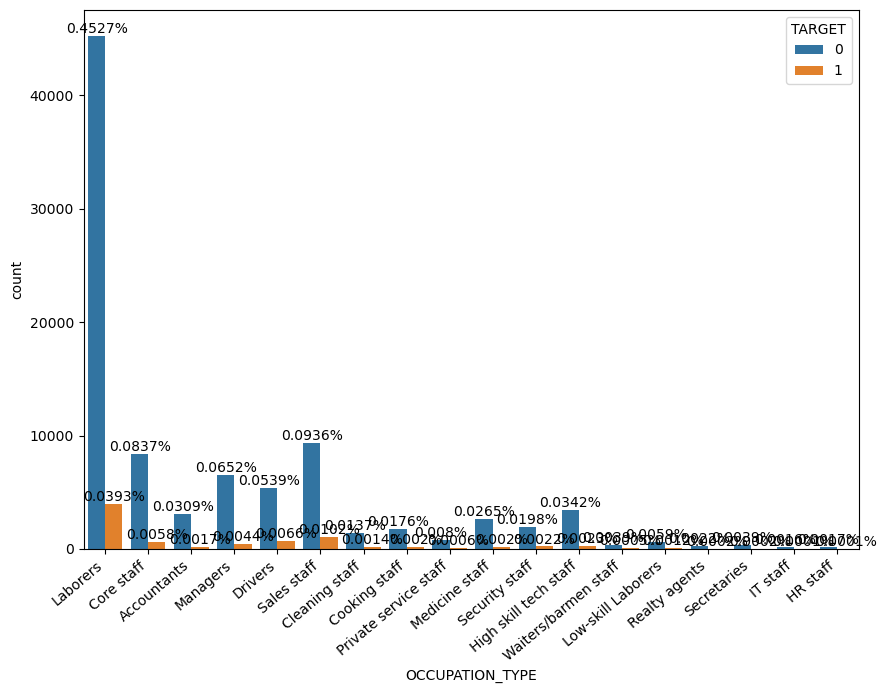

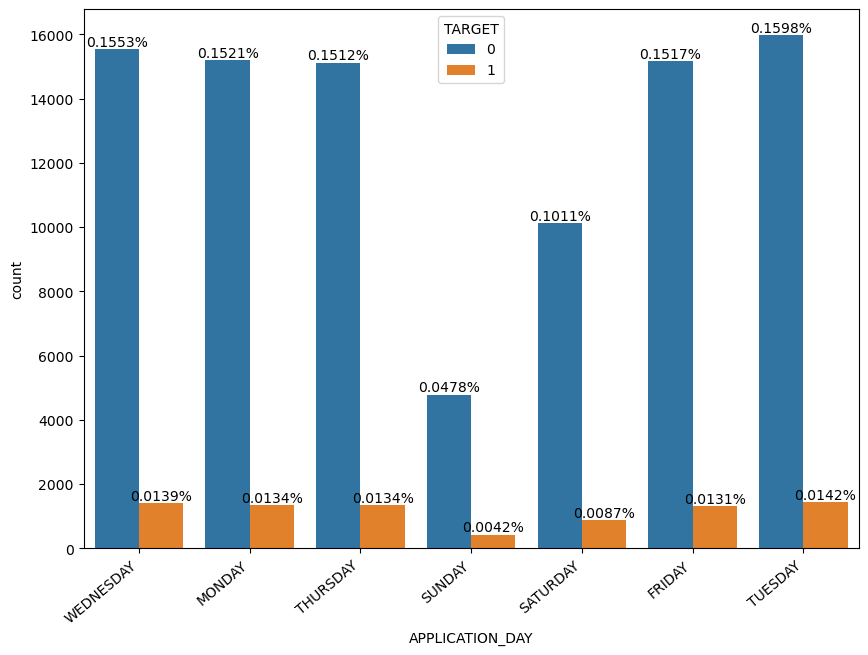

In [8]:
for i in x1:
    fig, ax = plt.subplots(figsize = (10, 7))
    ax=sns.countplot(x = i, hue = "TARGET", data = df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right")
    for bar in ax.patches:                                              # ax.patches returns the rectange object from matplotlib          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
        percentage = f"{round(bar.get_height() /len(df), 4)}%"                                                            # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
        x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
        y = round(bar.get_height())                                           # get_height: returns height of rectange
        ax.annotate(percentage,(x, y),  va = "bottom", ha ="center" )
    plt.show()

In [ ]:
"""" INTERPRETATIONS BASED ON TARGETS
all together:(92% not delayed,8% delayed based on loans)
CASH LOANS ARE NOT  MUCH DELAYED COMPARED TO REVOLVING LOANS,
FEMALES ARE NOT  MUCH DELAYED
APPLICANTS THOSE WHO DONT HAVE CAR HAVE NOT DELAYED COMPARED
house owners- who have house have cleared
UNACCOMPANIED ARE NOT DELAYED MUCH COMPARED TO OTHERS()
WORKING ARE NOT MUCH DELAYED.....UNEMPLOYED ,STUDENT,BUSINESS MAN AND MATERNITY LEAVE HAVE VERY LESS IMPACT ON LOAN DELAYING OR NOT DELAYING
INCOME OF  PENSIONERS THOSE ARE BLANK HAVE HIGH RATE OF NOT DELAYING NEXT TO LABOURERS 
SECONDARY EDUCATION HAVE DELAYED MUCH
MARRIED HAVE NOT MUCH  DELAYED""" 

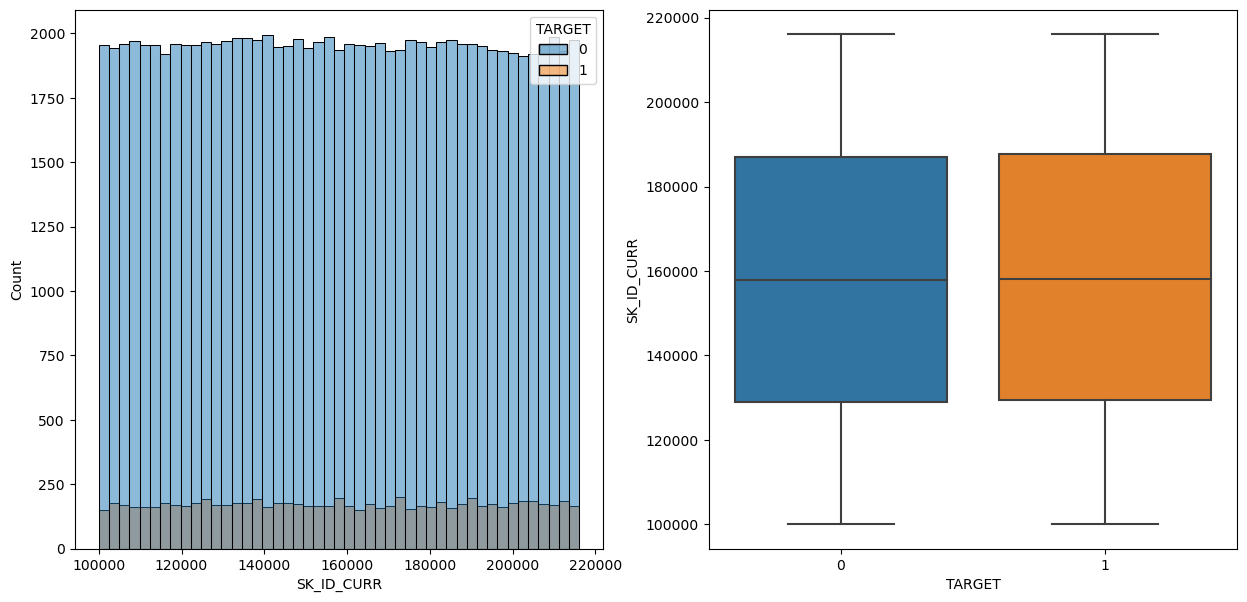

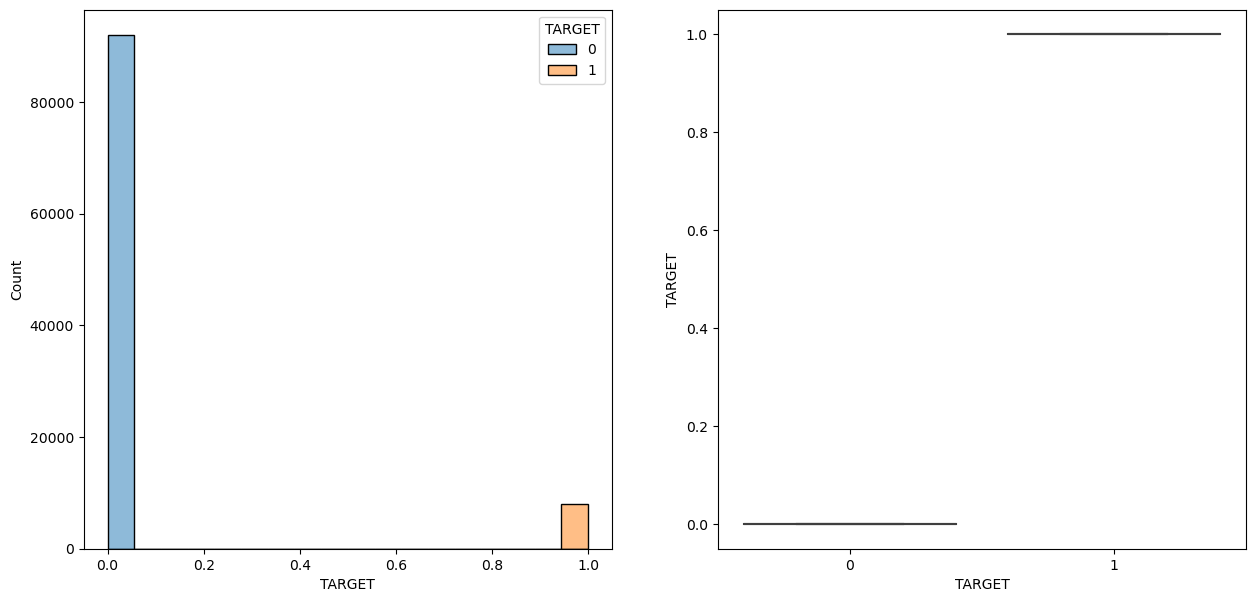

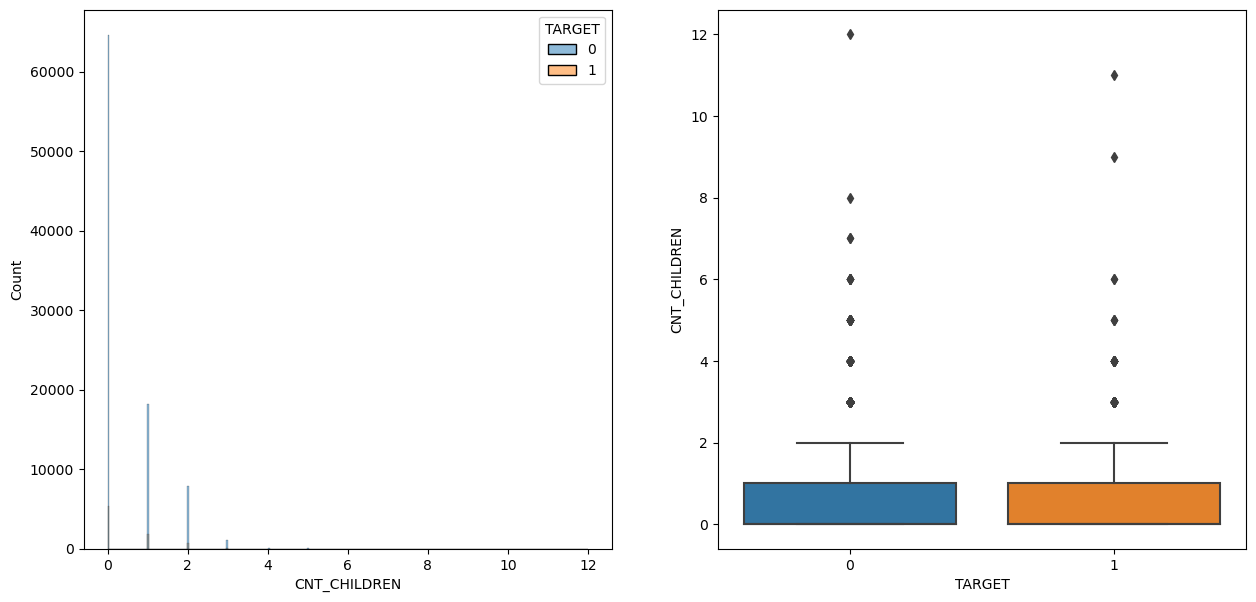

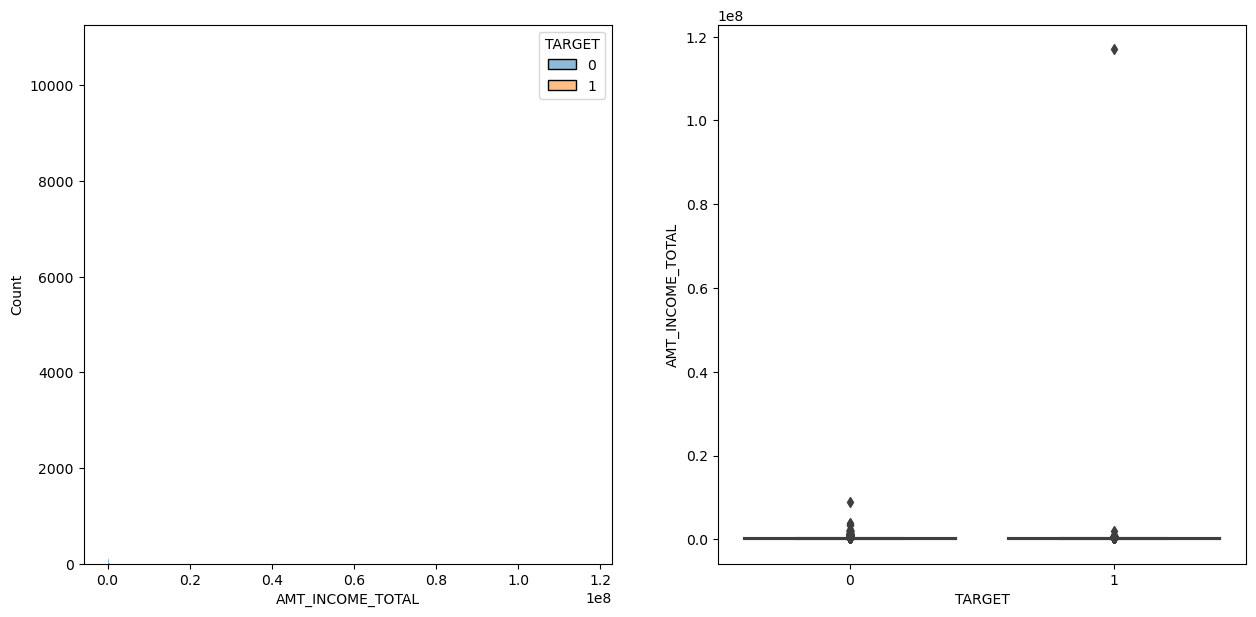

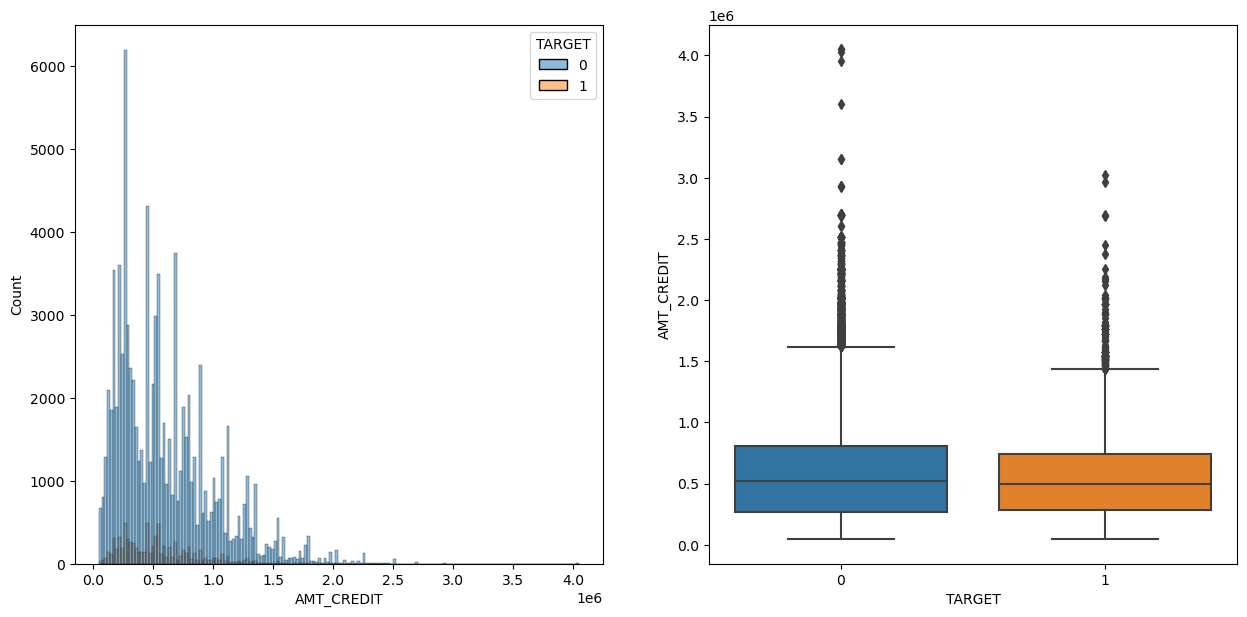

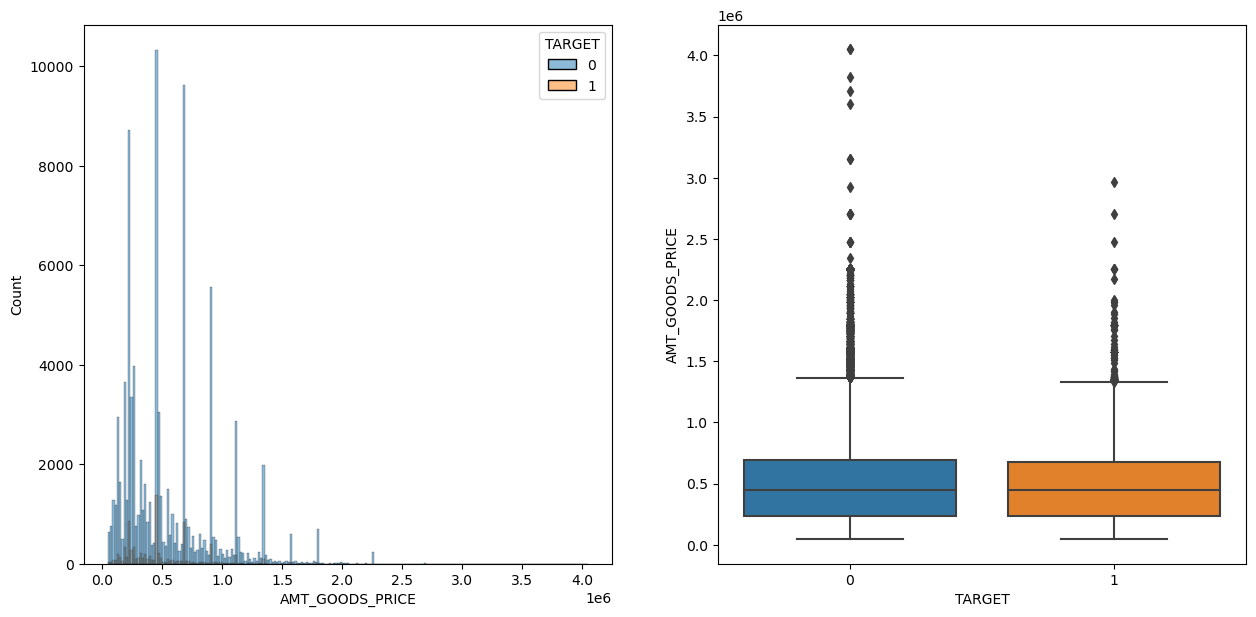

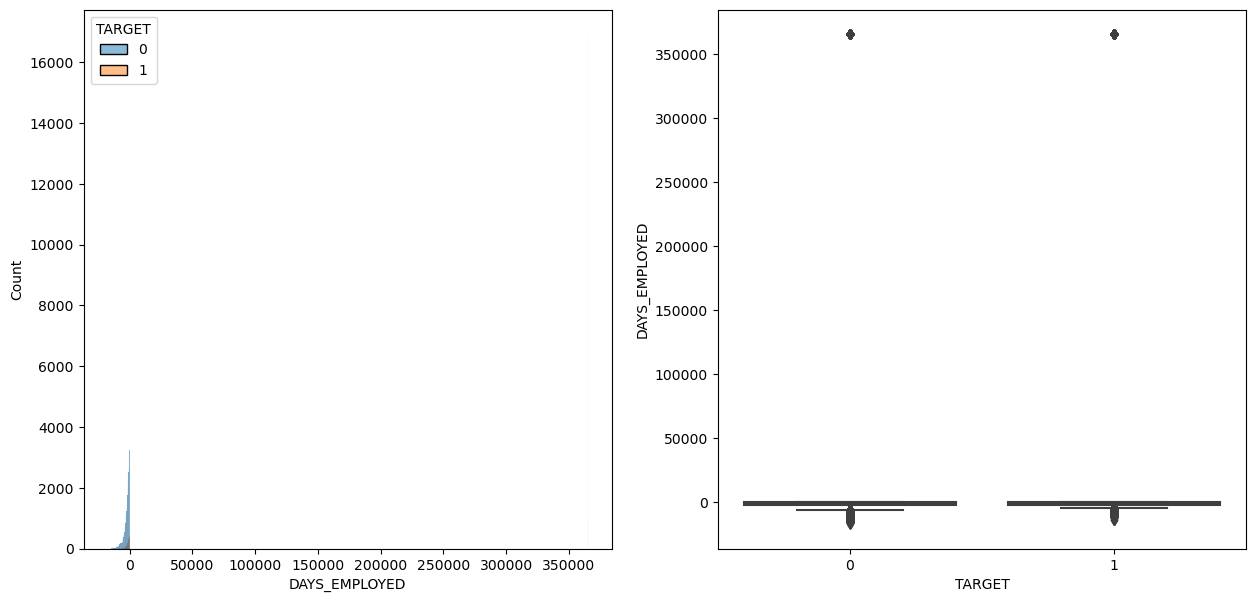

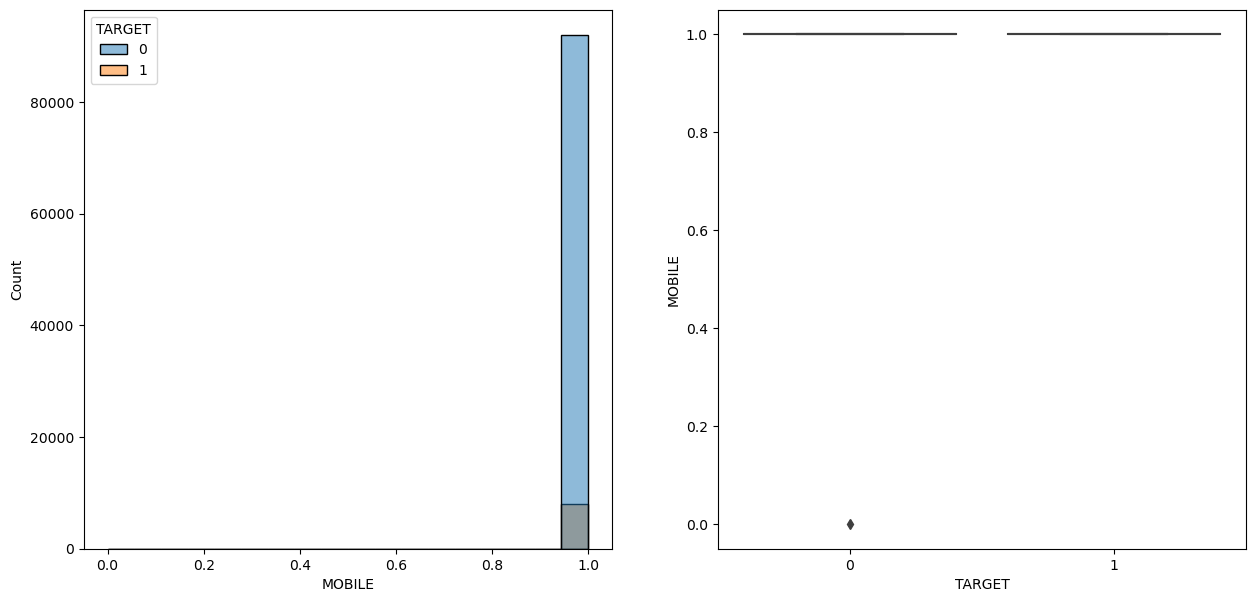

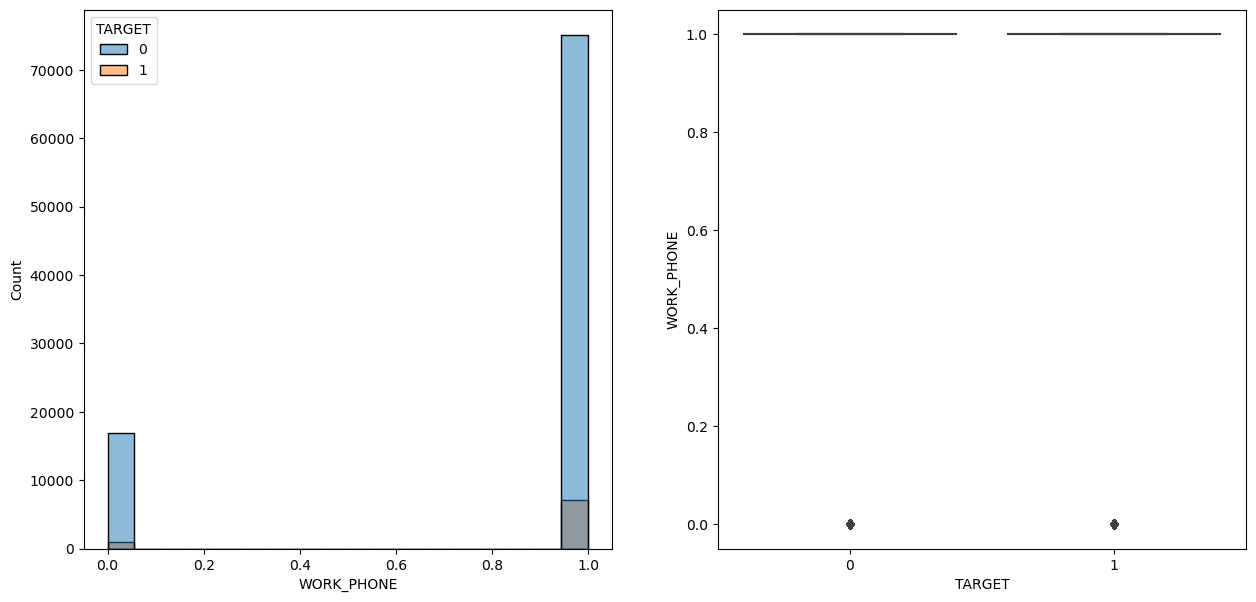

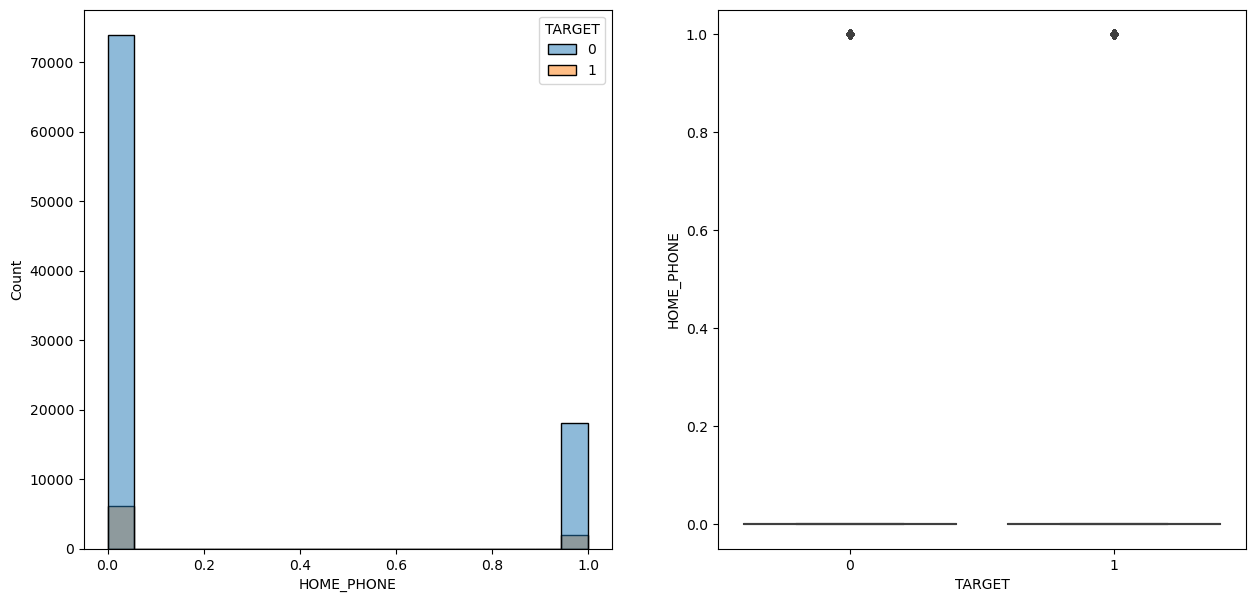

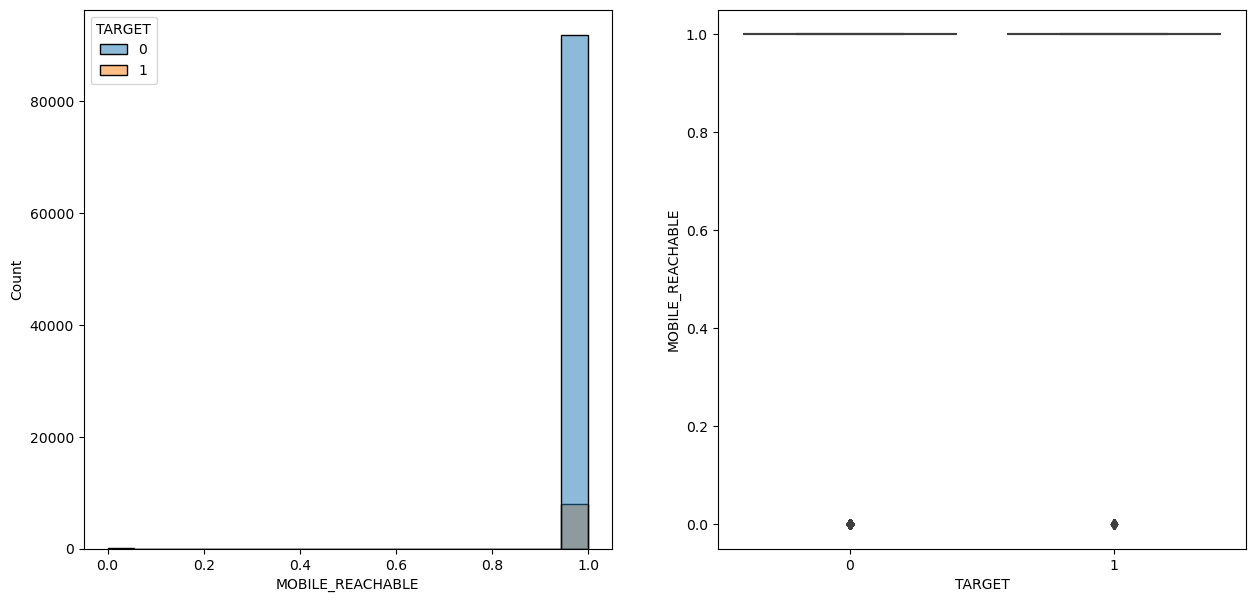

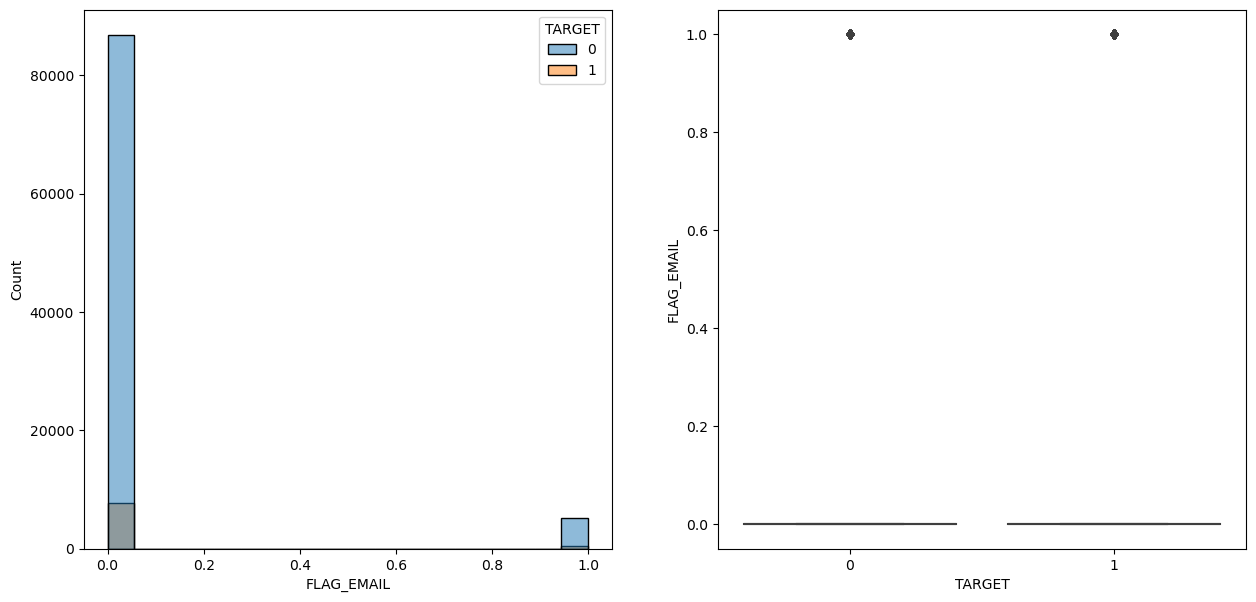

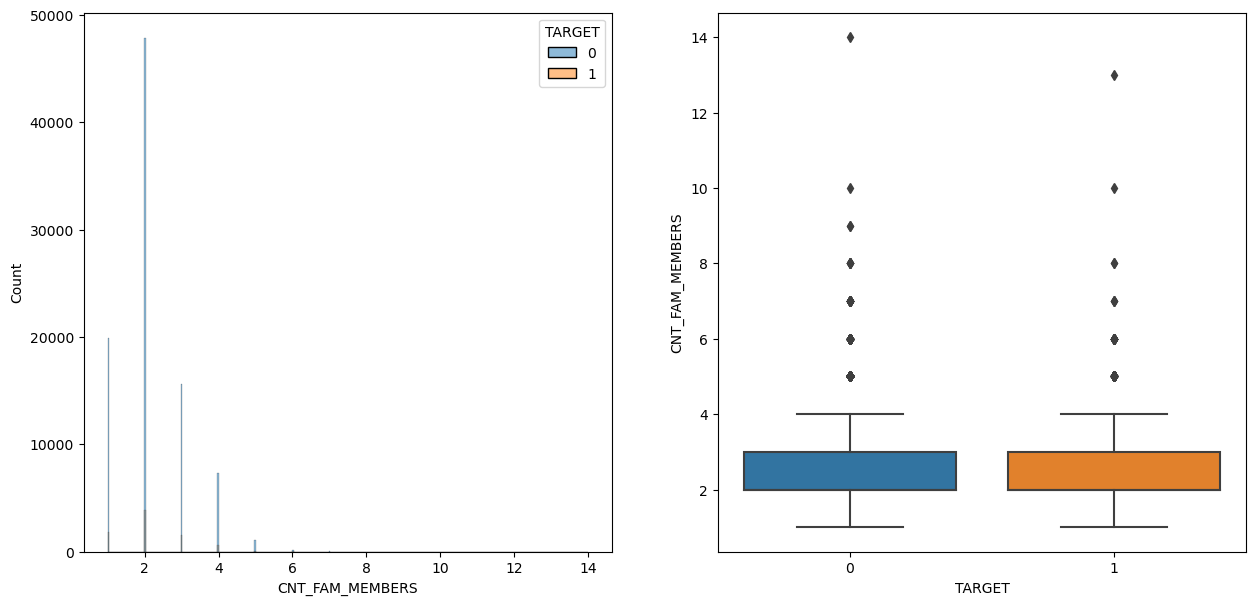

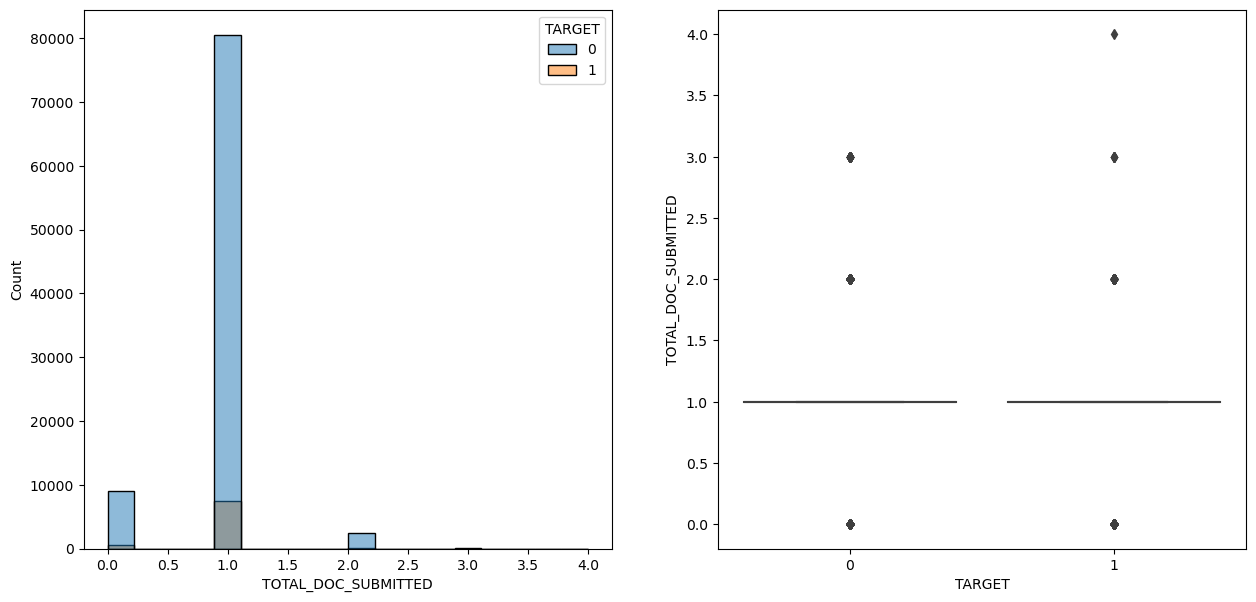

In [9]:
for i in y1:
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 7))
    sns.histplot(x = df[i], hue = df["TARGET"], ax = ax[0])
    sns.boxplot(y = df[i], x = df["TARGET"], ax = ax[1])
    plt.show()

In [ ]:
"""INTERPRETATIONS:
AMOUNT CREDIT  WITH DISTRIBUTIONS BETWEEN 0.0 TO 0.5,
3.5 AND 4 HAVE NOT DELAYED MUCH
TILL3.0 THERE ARE DELAYING AND NOT DELAYING ALSO
DAYS EMPLOYED GIVE EQUAL CONTRIBUTIION TO DELAY OR NOT DELAYING"""

In [10]:
d=pd.DataFrame((df['SK_ID_CURR'], df['TARGET'],df['CNT_CHILDREN'],df['AMT_INCOME_TOTAL'],df['AMT_CREDIT'],df['AMT_GOODS_PRICE'],df['DAYS_EMPLOYED'],df['MOBILE'],df['WORK_PHONE'],df['HOME_PHONE'],df['MOBILE_REACHABLE'],df['FLAG_EMAIL'],df['CNT_FAM_MEMBERS'],df['TOTAL_DOC_SUBMITTED']))
f=d.transpose()
f

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
0,100002.0,1.0,0.0,202500.0,406597.5,351000.0,-637.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,100003.0,0.0,0.0,270000.0,1293502.5,1129500.0,-1188.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0
2,100004.0,0.0,0.0,67500.0,135000.0,135000.0,-225.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,100006.0,0.0,0.0,135000.0,312682.5,297000.0,-3039.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0
4,100007.0,0.0,0.0,121500.0,513000.0,513000.0,-3038.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086.0,0.0,1.0,157500.0,755190.0,675000.0,-232.0,1.0,1.0,1.0,1.0,0.0,3.0,1.0
99996,216087.0,0.0,1.0,225000.0,284400.0,225000.0,-182.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0
99997,216088.0,0.0,0.0,135000.0,1262583.0,1102500.0,-4805.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0
99998,216089.0,0.0,0.0,135000.0,225000.0,225000.0,-340.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0


<Axes: >

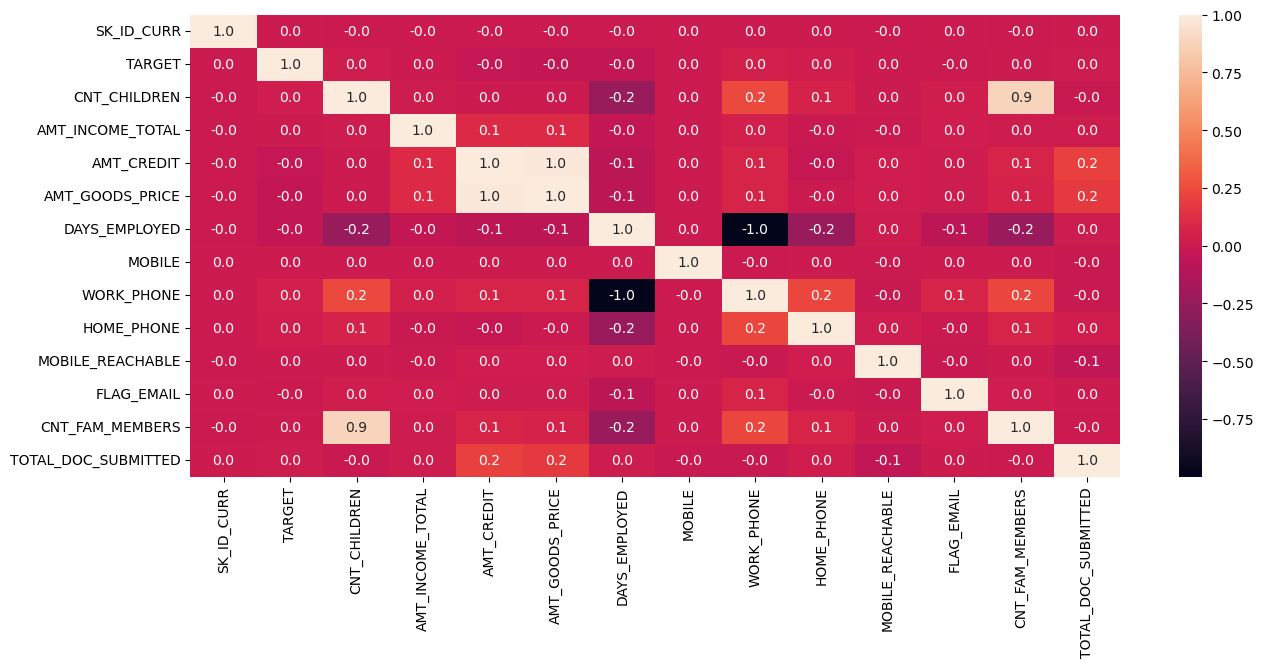

In [11]:
#finding correlation of all columns 
corr_df=f.corr() 
#plotting heat map to show correlation 
plt.figure(figsize=(15,6))
sns.heatmap(corr_df,annot=True,fmt='.1f',linecolor='yellow')

### interpretation is target is  very slightly negatively correlated to days employed ,amount credit
#### that means target=1(delaying)when days employed before loan  is less
####  target=1(delaying) when good price is less 
####  tasrget=1 (delaying) when amt credit is less

In [ ]:
# INTERPRETATION:
"""CATEGORICAL COLUMNS that affect target:
IN ACCOMPANY TYPE:UNACCOMPANIED CAN ALSO BE CONSIDERED
AND TARGET=0 SHOULD BE CONSIDERED AS THEY ARE NOT AT ALL DELAYING
OCCUPATION:STUDENTS HAVE NOT DELAYED AT ALL SO ALL STUDENTS CAN BE CONSIDERED , all business man can be considered regarding
unemployeed,maternity leave can be considered if they are revolving loans,others can be considered if they have worked and 
income source is there
NUMERICAL COLUMNS: TARGET HAVE SLIGHT NEGATIVE EFFECT ON DAYS EMPLOYEED"""
